## Dim reduction (PCA/tSNE) and clustering

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # for plotting
import scipy.cluster.hierarchy as shc
import sklearn.preprocessing as skpp

import matplotlib.cm as cm # colormap
import re # reg expression

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [6]:
data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/PlayerAttributeData.csv',index_col=0)

data.head(5)


/Users/iMotz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


### Clean data

In [7]:
# drop some cols
data_clean = data.drop(columns = ['ID'])

# the data contains strings, and even sums! eg 5 + 7
# find + and -, re.match(), re.search(), re.findall()

my_expr = r'[+-]\d+'
data_clean = data_clean.replace(to_replace = my_expr, value = '', regex = True)

# convert to numbers
data_clean = data_clean.astype('float64')
data_clean.head(5)


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


### Scale data

In [8]:
# features are at same scale, but better to normalize anyway
data_scaled = skpp.StandardScaler().fit_transform(data_clean)
data_scaled = pd.DataFrame(data_scaled, columns = list(data_clean.head(0))  )
data_scaled.describe()


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,...,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04
mean,7.429560e-16,2.524444e-16,-1.633431e-15,2.776885e-16,-4.945219e-16,2.109134e-15,2.432365e-15,-2.383658e-14,1.347247e-15,5.847586e-15,...,-4.257117e-15,-8.077850e-15,-3.792306e-15,3.298483e-15,-1.931273e-15,-4.245459e-15,3.416531e-15,2.678326e-16,-1.708833e-15,1.608400e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-3.595752e+00,-2.565971e+00,-3.335987e+00,-3.747381e+00,-2.982966e+00,-4.092037e+00,-2.426041e+00,-2.237819e+00,-2.794377e+00,-2.223317e+00,...,-3.696682e+00,-3.237001e+00,-3.026831e+00,-1.935016e+00,-3.677821e+00,-3.219420e+00,-1.989847e+00,-4.223764e+00,-2.990370e+00,-2.211945e+00
25%,-5.769630e-01,-7.340446e-01,-5.640217e-01,-5.545293e-01,-3.041813e-01,-5.334787e-01,-6.382588e-01,-7.210940e-01,-3.721416e-01,-8.369383e-01,...,-7.528426e-01,-3.553738e-01,-5.552931e-01,-1.004094e+00,-5.350974e-01,-4.560292e-01,-9.822371e-01,-5.778984e-01,-6.966422e-01,-7.458804e-01
50%,1.609633e-01,1.819185e-01,1.120674e-01,1.549933e-01,2.911043e-01,1.627610e-01,2.285446e-01,3.726831e-02,3.124032e-01,1.386616e-01,...,1.037496e-02,2.477576e-01,1.919160e-01,2.991959e-01,1.481035e-01,1.720143e-01,3.001748e-01,5.616510e-02,1.374405e-01,4.353922e-02
75%,6.976370e-01,7.543954e-01,7.205476e-01,7.226113e-01,6.482756e-01,7.042807e-01,7.702968e-01,7.956306e-01,6.810043e-01,8.061773e-01,...,6.645614e-01,6.498451e-01,7.666922e-01,8.577489e-01,6.946642e-01,6.744490e-01,8.497799e-01,6.902286e-01,7.630025e-01,7.765717e-01
max,2.106405e+00,2.300083e+00,2.207944e+00,2.283561e+00,2.196018e+00,2.947720e+00,2.233028e+00,2.420693e+00,2.208066e+00,2.551988e+00,...,3.717432e+00,2.258195e+00,2.203633e+00,2.114493e+00,2.129386e+00,1.993340e+00,2.040591e+00,2.592419e+00,2.848209e+00,2.693734e+00


### PCA

In [9]:
# PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, 
#     tol=0.0, iterated_power=’auto’, random_state=None)

pca = PCA()
pca_obj = pca.fit(data_scaled) 


#### Look at Variance explained

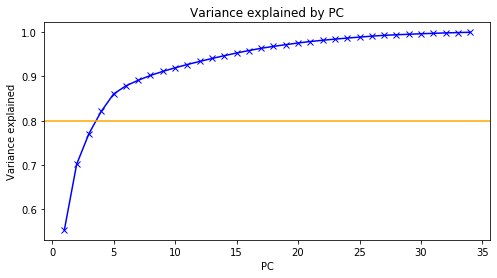

In [10]:
x_lab = list(range(1,len(data_scaled.columns)+1))

plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(x_lab, np.cumsum(pca_obj.explained_variance_ratio_),'bx-')
plt.axhline(y = 0.8,color = 'orange')
plt.xlabel('PC')
plt.ylabel('Variance explained')
plt.title('Variance explained by PC')
None

#### Cluster first 4 PCs

In [11]:
# get 4 PCs
my_pca = PCA(n_components = 4)
my_pca_obj = my_pca.fit(data_scaled)
data_pca = my_pca.fit_transform(data_scaled)

# convert into df
PCA_df = pd.DataFrame(data = data_pca, columns = ['PC1','PC2','PC3','PC4'])
PCA_df.head(5)

,PC1,PC2,PC3,PC4
0,-8.109051,-3.668157,4.320169,0.951450
1,-7.895365,-5.312903,3.328337,-0.891206
2,-7.097581,-4.741296,2.422742,-1.015384
3,-6.355679,-3.283727,5.452014,0.154252
4,8.578872,-1.743550,6.892089,-2.424947


In [12]:
# kmeans clustering
result_kmeans = KMeans(n_clusters = 4).fit(PCA_df)

cluster_ID = result_kmeans.labels_


In [13]:
# add cluster ID to df, sort!
data_sorted_ID = PCA_df.copy() # copy of orig

data_sorted_ID['Cluster_ID'] = cluster_ID # add col
data_sorted_ID = data_sorted_ID.sort_values('Cluster_ID', ascending = True).reset_index()

data_sorted = data_sorted_ID.drop(columns = ['Cluster_ID','index'])


In [14]:
# convert cluster ID to color
data_sorted_ID['Cluster'] = 'aquamarine'
data_sorted_ID['Cluster'][data_sorted_ID['Cluster_ID'] == 1] = 'turquoise'
data_sorted_ID['Cluster'][data_sorted_ID['Cluster_ID'] == 2] = 'lightseagreen'
data_sorted_ID['Cluster'][data_sorted_ID['Cluster_ID'] == 3] = 'teal'


/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


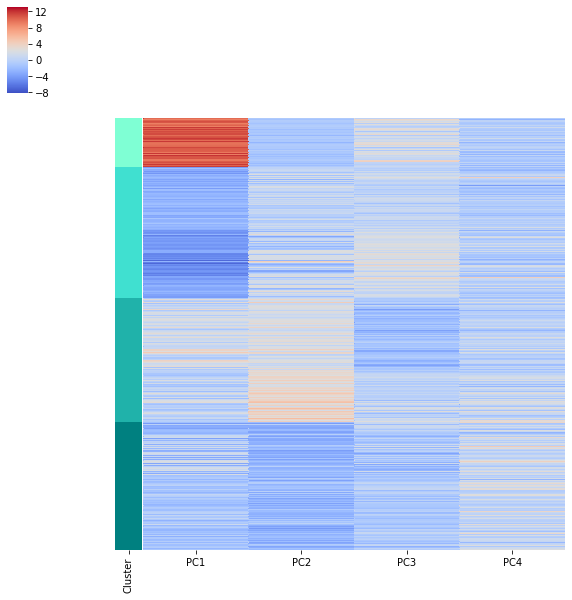

In [15]:
sns.clustermap(data_sorted, cmap = 'coolwarm', 
               row_cluster=False, col_cluster=False, # turns off clustering
               yticklabels=False,
               row_colors = data_sorted_ID['Cluster']) # adds colors per cluster

None

#### Look at feature contributions to PCs

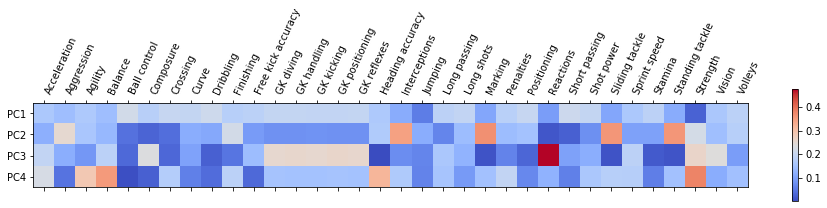

In [16]:
plt.matshow(abs(my_pca_obj.components_), cmap='coolwarm')
plt.yticks([0,1,2,3],['PC1','PC2','PC3', 'PC4'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data_scaled.columns)), data_scaled.columns, rotation = 65, ha='left')
None

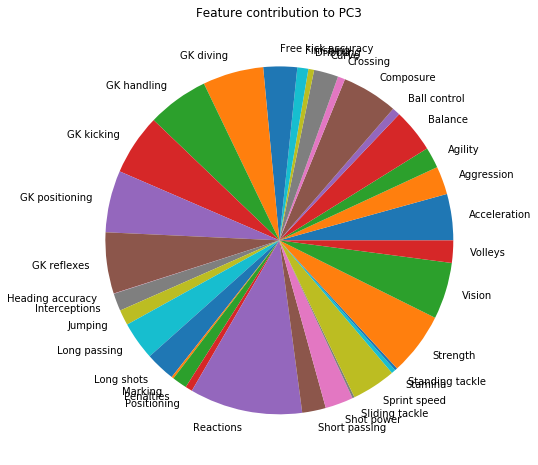

In [62]:
# Plot
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(abs(my_pca_obj.components_[2]), labels = data_scaled.columns)
plt.title('Feature contribution to PC3')
None        

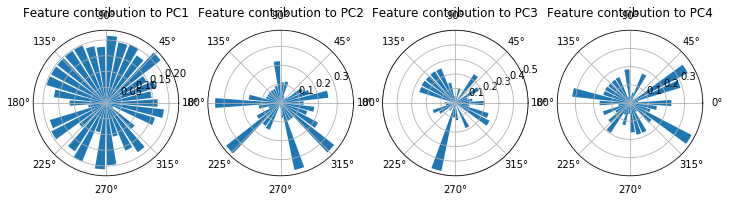

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
# position around circle
theta = np.linspace(0.0, 2*np.pi, len(data_scaled.columns), endpoint = False)
# height of bars
# radius = abs(my_pca_obj.components_[3])

fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4)

ax1 = plt.subplot(141, projection = 'polar')
ax1.bar(theta, abs(my_pca_obj.components_[0]), width=0.15 )
ax1.set_title('Feature contribution to PC1')

ax2 = plt.subplot(142, projection = 'polar')
ax2.bar(theta, abs(my_pca_obj.components_[1]), width=0.15 )
ax2.set_title('Feature contribution to PC2')

ax3 = plt.subplot(143, projection = 'polar')
ax3.bar(theta, abs(my_pca_obj.components_[2]), width=0.15 )
ax3.set_title('Feature contribution to PC3')

ax4 = plt.subplot(144, projection = 'polar')
ax4.bar(theta, abs(my_pca_obj.components_[3]), width=0.15 )
ax4.set_title('Feature contribution to PC4')

None

### Sankey diagram

To compare clustering result between

1) k-means on selected features

2) k-means on 4 PCs

In [18]:
# get cluster id and row id
cluster_IDs_PCA = data_sorted_ID.copy()
cluster_IDs_PCA = cluster_IDs_PCA.drop(columns = ['PC1','PC2','PC3', 'PC4','Cluster'])
cluster_IDs_PCA.head(3)

,index,Cluster_ID
0,10477,0
1,1478,0
2,16341,0


#### Perform k-means clustering on data with corr cols removed

In [19]:
# load data set with corr columns removed
data_corr_rem = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/Doris_football_clean.csv', index_col = 0)


In [20]:
# kmeans clustering
result_kmeans_clean = KMeans(n_clusters = 4).fit(data_corr_rem)
cluster_ID_clean = result_kmeans_clean.labels_

# add cluster ID to df
data_sorted_ID_clean = data_corr_rem.copy() # copy of orig
data_sorted_ID_clean['Cluster_ID'] = cluster_ID_clean # add col
data_sorted_ID_clean = data_sorted_ID_clean.sort_values('Cluster_ID', ascending = True).reset_index()

cluster_IDs_clean = data_sorted_ID_clean.loc[:,['Cluster_ID','index']]
cluster_IDs_clean.head(3)


,Cluster_ID,index
0,0,8990
1,0,13267
2,0,13270


#### Calculate values for Sankey

In [21]:
df_sankey = pd.merge(cluster_IDs_PCA, cluster_IDs_clean, left_on='index', right_on='index' )
df_sankey.head(5)

,index,Cluster_ID_x,Cluster_ID_y
0,10477,0,1
1,1478,0,1
2,16341,0,1
3,1476,0,1
4,13348,0,1


In [22]:
df_sankey_summary = pd.DataFrame(columns = ['SourceCluster','TargetCluster','Values'], data = [])
df_sankey_summary['SourceCluster'] = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
df_sankey_summary['TargetCluster'] = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]

value_list = []
for i in range(len(df_sankey_summary)):
    curr_source = df_sankey_summary['SourceCluster'][i]
    curr_targ = df_sankey_summary['TargetCluster'][i] 
    curr_result = np.sum((df_sankey['Cluster_ID_x'] == curr_source) & (df_sankey['Cluster_ID_y'] == curr_targ))
    value_list.append(curr_result)

df_sankey_summary['Values'] = value_list


In [23]:
# convert values into dictionary
my_links = []

for i in range(len(df_sankey_summary)):
    my_links.append({'source': 'A'+str(df_sankey_summary['SourceCluster'][i]), 
                     'target': 'B'+ str(df_sankey_summary['TargetCluster'][i]), 
                     'value': df_sankey_summary['Values'][i]})    
my_links    


[{'source': 'A0', 'target': 'B0', 'value': 1},
 {'source': 'A0', 'target': 'B1', 'value': 2028},
 {'source': 'A0', 'target': 'B2', 'value': 0},
 {'source': 'A0', 'target': 'B3', 'value': 0},
 {'source': 'A1', 'target': 'B0', 'value': 333},
 {'source': 'A1', 'target': 'B1', 'value': 0},
 {'source': 'A1', 'target': 'B2', 'value': 200},
 {'source': 'A1', 'target': 'B3', 'value': 4957},
 {'source': 'A2', 'target': 'B0', 'value': 1041},
 {'source': 'A2', 'target': 'B1', 'value': 1},
 {'source': 'A2', 'target': 'B2', 'value': 3404},
 {'source': 'A2', 'target': 'B3', 'value': 706},
 {'source': 'A3', 'target': 'B0', 'value': 3881},
 {'source': 'A3', 'target': 'B1', 'value': 0},
 {'source': 'A3', 'target': 'B2', 'value': 645},
 {'source': 'A3', 'target': 'B3', 'value': 784}]

In [25]:
from ipysankeywidget import SankeyWidget

# A: cluster on PCA, B: cluster on selected features
my_order = [ ['A0','A1','A2','A3'],['B1', 'B3','B2','B0']]

SankeyWidget(links = my_links, order = my_order, margins=dict(top=10, bottom=0, left=30, right=60))

SankeyWidget(links=[{'source': 'A0', 'target': 'B0', 'value': 1}, {'source': 'A0', 'target': 'B1', 'value': 20…

## t-SNE vs PCA

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

In [38]:
# TSNE(n_components = 2, perplexity = 30.0, early_exaggeration=12.0, 
#      learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
#      min_grad_norm=1e-07, metric=’euclidean’, init=’random’, 
#      verbose=0, random_state=None, method=’barnes_hut’, angle=0.5)

tsne_data = TSNE(n_components=2, perplexity = 50, verbose = 1).fit_transform(data_scaled)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 17981 samples in 0.021s...
[t-SNE] Computed neighbors for 17981 samples in 16.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17981
[t-SNE] Computed conditional probabilities for sample 2000 / 17981
[t-SNE] Computed conditional probabilities for sample 3000 / 17981
[t-SNE] Computed conditional probabilities for sample 4000 / 17981
[t-SNE] Computed conditional probabilities for sample 5000 / 17981
[t-SNE] Computed conditional probabilities for sample 6000 / 17981
[t-SNE] Computed conditional probabilities for sample 7000 / 17981
[t-SNE] Computed conditional probabilities for sample 8000 / 17981
[t-SNE] Computed conditional probabilities for sample 9000 / 17981
[t-SNE] Computed conditional probabilities for sample 10000 / 17981
[t-SNE] Computed conditional probabilities for sample 11000 / 17981
[t-SNE] Computed conditional probabilities for sample 12000 / 17981
[t-SNE] Computed conditional probabilities for s

(17981, 2)

In [55]:
tsne_data_30 = TSNE(n_components=2, perplexity = 30, verbose = 1).fit_transform(data_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17981 samples in 0.020s...
[t-SNE] Computed neighbors for 17981 samples in 18.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17981
[t-SNE] Computed conditional probabilities for sample 2000 / 17981
[t-SNE] Computed conditional probabilities for sample 3000 / 17981
[t-SNE] Computed conditional probabilities for sample 4000 / 17981
[t-SNE] Computed conditional probabilities for sample 5000 / 17981
[t-SNE] Computed conditional probabilities for sample 6000 / 17981
[t-SNE] Computed conditional probabilities for sample 7000 / 17981
[t-SNE] Computed conditional probabilities for sample 8000 / 17981
[t-SNE] Computed conditional probabilities for sample 9000 / 17981
[t-SNE] Computed conditional probabilities for sample 10000 / 17981
[t-SNE] Computed conditional probabilities for sample 11000 / 17981
[t-SNE] Computed conditional probabilities for sample 12000 / 17981
[t-SNE] Computed conditional probabilities for sa

In [53]:
# convert cluster IDs from kmeans into color
tsne_colors = pd.DataFrame(columns = ['color_ID'], data = cluster_ID_clean)
tsne_colors['color'] = 'aquamarine'
tsne_colors['color'][tsne_colors['color_ID'] == 1] = 'turquoise'
tsne_colors['color'][tsne_colors['color_ID'] == 2] = 'lightseagreen'
tsne_colors['color'][tsne_colors['color_ID'] == 3] = 'teal'


/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/iMotz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


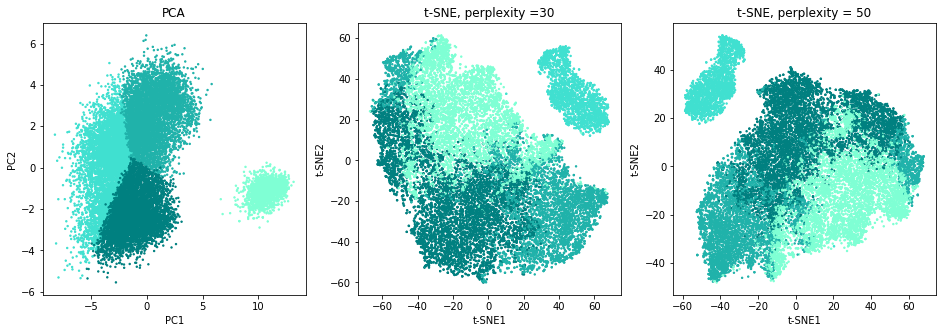

In [66]:
plt.rcParams['figure.figsize'] = (16, 5)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

ax1.scatter(x = data_sorted_ID['PC1'], y = data_sorted_ID['PC2'], color = data_sorted_ID['Cluster'], s = 2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PCA')

ax2.scatter(x = tsne_data_30[:,0], y = tsne_data_30[:,1], color =tsne_colors['color'], s = 2)
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
ax2.set_title('t-SNE, perplexity =30')

ax3.scatter(x = tsne_data[:,0], y = tsne_data[:,1], color =tsne_colors['color'], s = 2)
ax3.set_xlabel('t-SNE1')
ax3.set_ylabel('t-SNE2')
ax3.set_title('t-SNE, perplexity = 50')

None